In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/User/Downloads/Online Sales Data.csv', parse_dates=['Date'])

In [4]:
#Order ID: уникальный идентификатор для каждого заказа на продажу.
#Date:  Дата сделки купли-продажи.
#Category:категория продаваемого товара (например, электроника, бытовая техника, одежда, книги, косметические товары, спорт).
#Product Name: конкретное название или модель продаваемого продукта.
#Quantity:количество единиц продукта, проданного в транзакции.
#Unit Price:Цена одной единицы продукта
#Total Price: общий доход, полученный от транзакции продажи (количество * цена за единицу).
#Region: географический регион
#Payment Method: способ оплаты


In [5]:
# задачи
#1. Анализируйте тенденции продаж с течением времени, чтобы выявить сезонные закономерности или возможности роста.
#2. Изучите популярность различных категорий товаров в разных регионах.
#3. Изучите влияние способов оплаты на объем продаж или выручку.
#4. Определите самые продаваемые продукты в каждой категории, чтобы оптимизировать запасы и маркетинговые стратегии.


In [6]:
#ПРЕДОБРАБОТКА ДАННЫХ

In [7]:
# проверяем датафрейм на качество данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    240 non-null    int64         
 1   Date              240 non-null    datetime64[ns]
 2   Product Category  240 non-null    object        
 3   Product Name      240 non-null    object        
 4   Units Sold        240 non-null    int64         
 5   Unit Price        240 non-null    float64       
 6   Total Revenue     240 non-null    float64       
 7   Region            240 non-null    object        
 8   Payment Method    240 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 17.0+ KB


In [8]:
# заменим пробелы в названии колонок на нижнее подчеркивание

# получаем список с названием колонок
col =list(df.columns)

In [9]:
col

['Transaction ID',
 'Date',
 'Product Category',
 'Product Name',
 'Units Sold',
 'Unit Price',
 'Total Revenue',
 'Region',
 'Payment Method']

In [10]:
# с помощью лямба фунции получаем список где пробел заменен на нижнее подчеркивание
result = list(map(lambda x: x.replace(' ', '_'), col))

In [11]:
result

['Transaction_ID',
 'Date',
 'Product_Category',
 'Product_Name',
 'Units_Sold',
 'Unit_Price',
 'Total_Revenue',
 'Region',
 'Payment_Method']

In [12]:
# с помощью метода rename переименовываем название колонок
df.rename(columns=dict(zip(col,result)), inplace=True)

In [13]:
df.head()

,Transaction_ID,Date,Product_Category,Product_Name,Units_Sold,Unit_Price,Total_Revenue,Region,Payment_Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [14]:
# 1 :Анализируйте тенденции продаж с течением времени, чтобы выявить сезонные закономерности или возможности роста.
# сгруппируем продажи по месяцам и категории продукта, для этого необходимо добавить в датафрейм столбец с месяцем 

In [15]:
df['month'] =  df['Date'].dt.month

In [16]:
df.head(5)

,Transaction_ID,Date,Product_Category,Product_Name,Units_Sold,Unit_Price,Total_Revenue,Region,Payment_Method,month
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,1
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,1
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,1
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,1
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,1


In [37]:
# Далее группируем датасет по сумме продаж по категории в месяц и удаляем лишние столбцы

In [38]:
df_1= df.groupby(['month', 'Product_Category']).sum('Total_Revenue').reset_index()

In [39]:
df_1.drop(columns=['Transaction_ID', 'Unit_Price'], inplace= True)

In [40]:
# сщздадим два графика для определения сезонности групп товаров по в рублях и в штуках

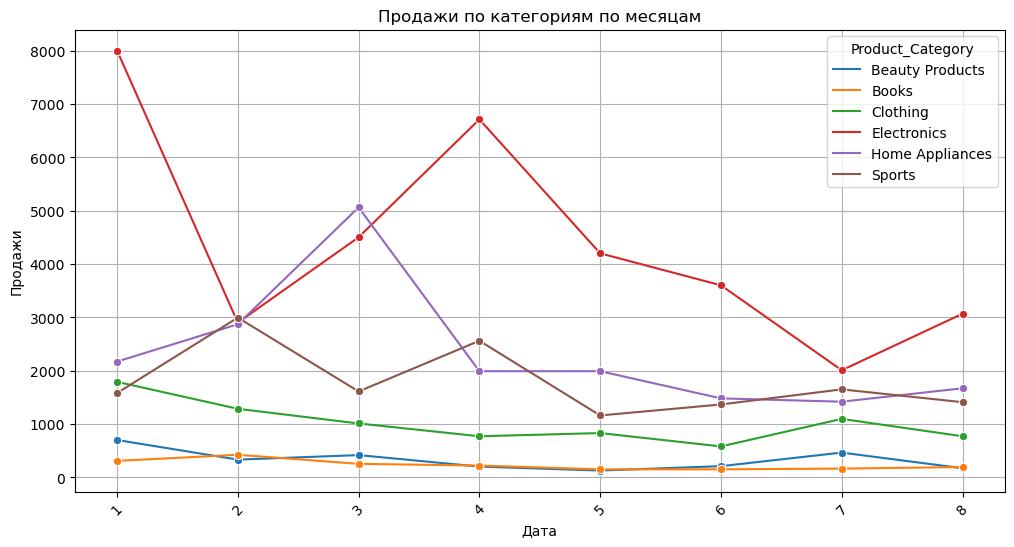

In [41]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_1, x='month', y='Total_Revenue', hue='Product_Category', marker='o')
plt.title('Продажи по категориям по месяцам')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

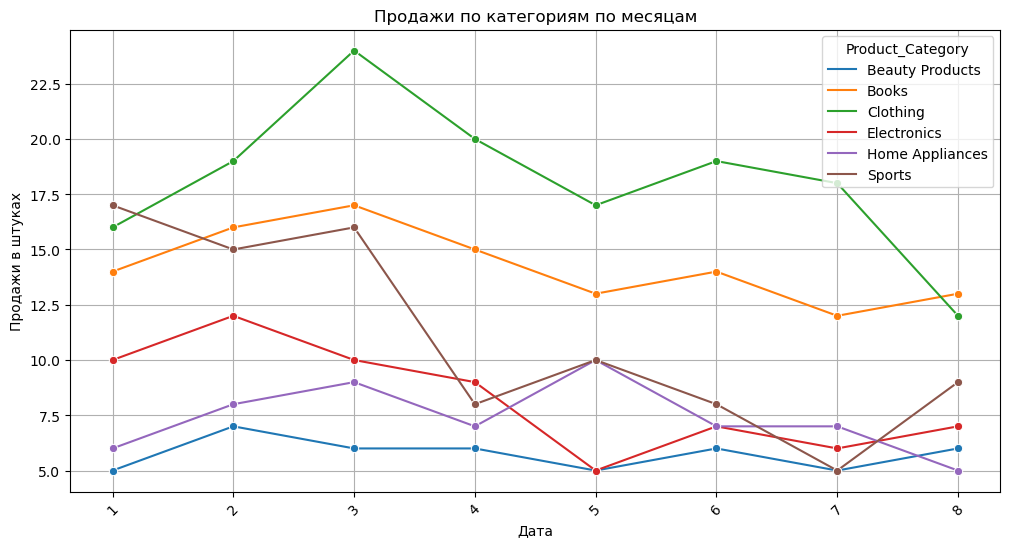

In [42]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_1, x='month', y='Units_Sold', hue='Product_Category', marker='o')
plt.title('Продажи по категориям по месяцам')
plt.xlabel('Дата')
plt.ylabel('Продажи в штуках')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [43]:
#2. Изучим популярность различных категорий товаров в разных регионах.
# для этого сгруппируем данные по сумме продаж каждого продукта по регионам
# с помощью метода idxmax() получим индекс максимального значения по сумме продаж, далее с помощью функции .loc[] 
#выберем нужные строки по возвращенному индексу

In [44]:
df_product=df.groupby(['Region', 'Product_Category']).sum('Total_Revenue').reset_index()

In [45]:
df_product.loc[df_product.groupby('Region')['Total_Revenue'].idxmax()]

,Region,Product_Category,Transaction_ID,Units_Sold,Unit_Price,Total_Revenue,month
1,Asia,Sports,404920,88,10451.36,14326.52,180
3,Europe,Home Appliances,404760,59,12807.42,18646.16,177
5,North America,Electronics,404720,66,27663.66,34982.41,174


In [46]:
# в регионе Азии популярна категория Sports, в Европе Home Appliances, в СА Electronics

In [47]:
#3. Изучите влияние способов оплаты на объем продаж или выручку.
# для этого рассмотрим данные по распределению долей объема продаж по способу оплаты, глобально и в разрезе региона
# 

In [48]:
df_pay = df.groupby(['Payment_Method']).sum('Total_Revenue').reset_index().sort_values('Total_Revenue', ascending=False)

In [49]:
df_pay = df_pay[['Payment_Method', 'Total_Revenue']]

In [50]:
total_pay = df_pay['Total_Revenue'].sum()

In [51]:
total_pay

80567.85

In [52]:
df_pay['share'] = (df_pay['Total_Revenue']/total_pay*100).round(2)

In [53]:
df_pay

,Payment_Method,Total_Revenue,share
0,Credit Card,51170.86,63.51
2,PayPal,21268.06,26.40
1,Debit Card,8128.93,10.09


In [54]:
df_pay_reg = df.groupby(['Region', 'Payment_Method']).sum('Total_Revenue').reset_index()

In [55]:
df_pay_reg_total = df.groupby(['Region']).sum('Total_Revenue').reset_index()

In [56]:
df_reg_share = df_pay_reg.merge(df_pay_reg_total, on='Region')

In [57]:
df_reg_share = df_reg_share[['Region','Payment_Method','Total_Revenue_x','Total_Revenue_y']]

In [58]:
df_reg_share.rename(columns={'Total_Revenue_x': 'by_payment_type',
                             'Total_Revenue_y': 'general_by_region' }, inplace=True)

In [59]:
df_reg_share['share'] = (df_reg_share['by_payment_type']/df_reg_share['general_by_region']*100).round(2)

In [60]:
df_reg_share

,Region,Payment_Method,by_payment_type,general_by_region,share
0,Asia,Credit Card,14326.52,22455.45,63.8
1,Asia,Debit Card,8128.93,22455.45,36.2
2,Europe,PayPal,21268.06,21268.06,100.0
3,North America,Credit Card,36844.34,36844.34,100.0


In [61]:
# В Азии большая часть оплачивается кредитной картой 63.8%, остальное дебетовые карты. 
# В Европе только через PayPal, В СА покупают только по кредитной карте.
#  Если оценивать оплаты глобально, то кредитные карты в мире 63,51, PayPal 26,4, дебетовые карты 10%

In [62]:
#4. Определите самые продаваемые продукты в каждой категории, чтобы оптимизировать запасы и маркетинговые стратегии.

# Для этого сгруппируем данные по категории и найдем самые продаваемые по штукам

In [64]:
df.groupby(['Product_Category','Product_Name']).sum('Units_Sold').reset_index()

,Product_Category,Product_Name,Transaction_ID,Units_Sold,Unit_Price,Total_Revenue,month
0,Beauty Products,Anastasia Beverly Hills Brow Wiz,10059,2,23.00,46.00,2
1,Beauty Products,Biore UV Aqua Rich Watery Essence Sunscreen,10113,1,15.00,15.00,4
2,Beauty Products,Caudalie Vinoperfect Radiance Serum,10209,1,79.00,79.00,7
3,Beauty Products,CeraVe Hydrating Facial Cleanser,10119,2,14.99,29.98,4
4,Beauty Products,Chanel No. 5 Perfume,10011,1,129.99,129.99,1
...,...,...,...,...,...,...,...
229,Sports,Yeti Rambler 20 oz Tumbler,10240,2,29.99,59.98,8
230,Sports,Yeti Rambler Bottle,10168,3,49.99,149.97,6
231,Sports,Yeti Rambler Tumbler,10048,6,39.99,239.94,2
232,Sports,Yeti Roadie 24 Cooler,10126,1,199.99,199.99,5
